In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline


In [4]:
data = pd.read_csv(r'C:\Users\wamuc\OneDrive\Desktop\Kamilimu_Assignment2\data\carseats.csv')

In [5]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df = data.copy()

In [10]:
#dropping the sales dataset
x= df.drop('Sales', axis=1)
#isolation of sales as a feature on its own
y= df.Sales

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= .3,random_state = 33)
X_train.drop_duplicates(inplace = True)
X_train.dropna(inplace = True)


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 11 to 20
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    280 non-null    int64 
 1   Income       280 non-null    int64 
 2   Advertising  280 non-null    int64 
 3   Population   280 non-null    int64 
 4   Price        280 non-null    int64 
 5   ShelveLoc    280 non-null    object
 6   Age          280 non-null    int64 
 7   Education    280 non-null    int64 
 8   Urban        280 non-null    object
 9   US           280 non-null    object
dtypes: int64(7), object(3)
memory usage: 24.1+ KB


In [14]:
#exclude all the categorical variables
X_train_numeric = X_train.select_dtypes(exclude ='object')
X_numeric_cols = X_train_numeric.columns
X_train_numeric.columns = X_numeric_cols

In [15]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 11 to 20
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    280 non-null    int64
 1   Income       280 non-null    int64
 2   Advertising  280 non-null    int64
 3   Population   280 non-null    int64
 4   Price        280 non-null    int64
 5   Age          280 non-null    int64
 6   Education    280 non-null    int64
dtypes: int64(7)
memory usage: 17.5 KB


In [16]:
X_train_numeric.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education
11,117,94,4,503,94,50,13
214,115,115,3,48,107,73,18
361,131,25,10,183,104,56,15
98,122,77,24,382,127,36,16
358,123,96,10,71,118,69,11


array([[<AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Advertising'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

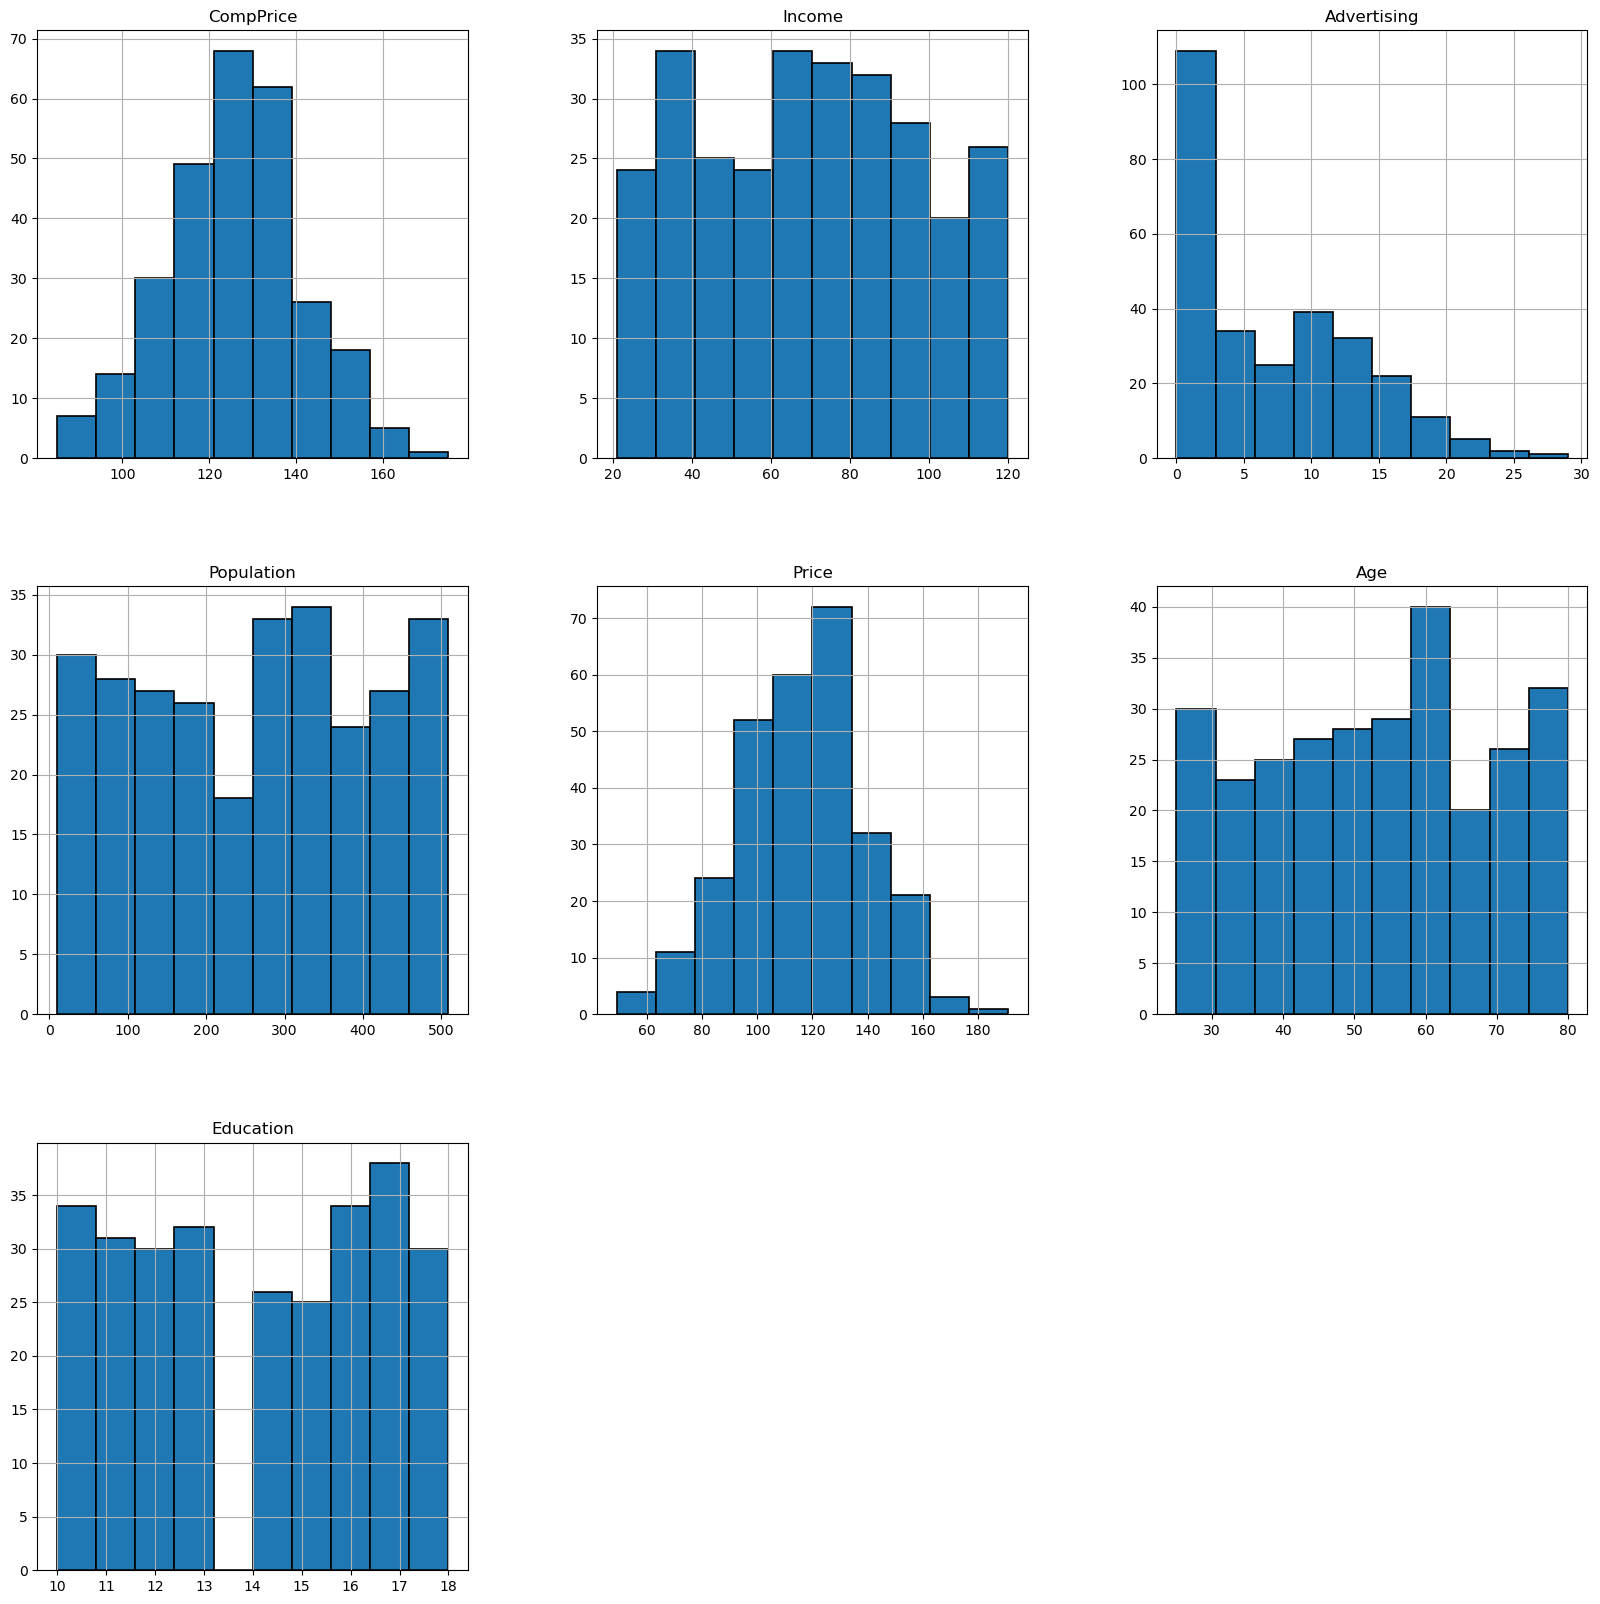

In [17]:
#visualizing the distribution of each data feature
X_train_numeric.hist(edgecolor = 'black', linewidth = 1.2,figsize= (20,20))

In [18]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


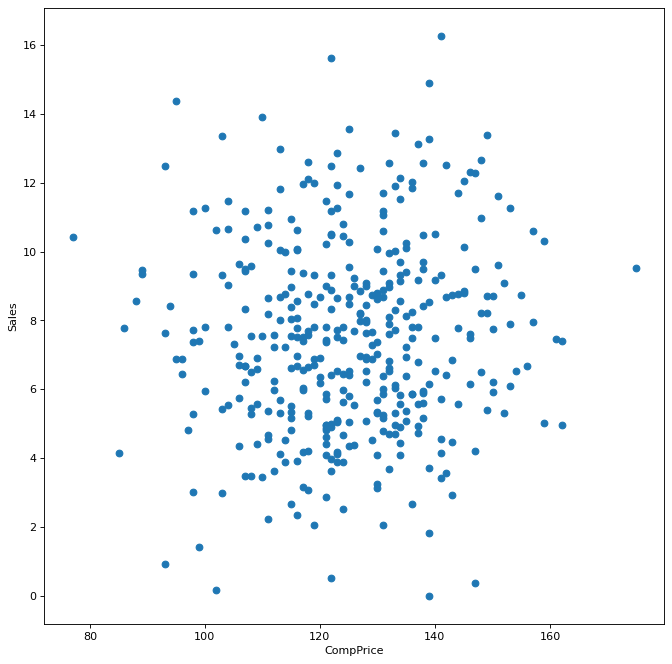

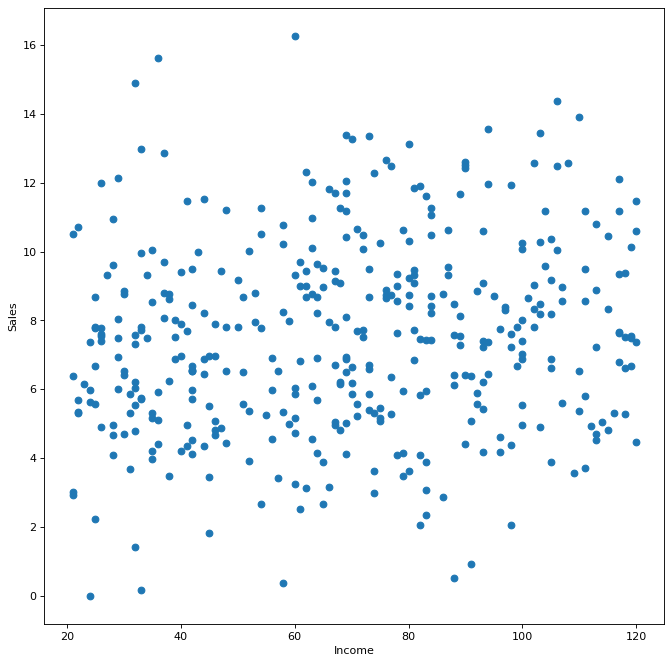

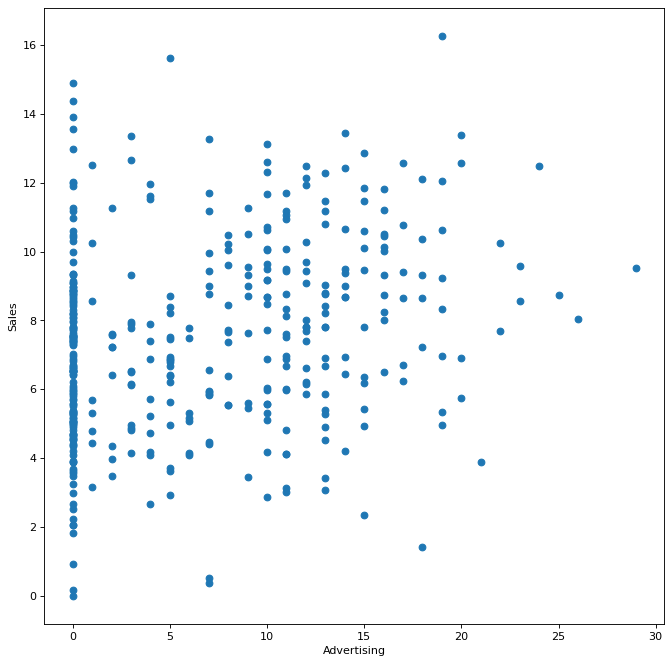

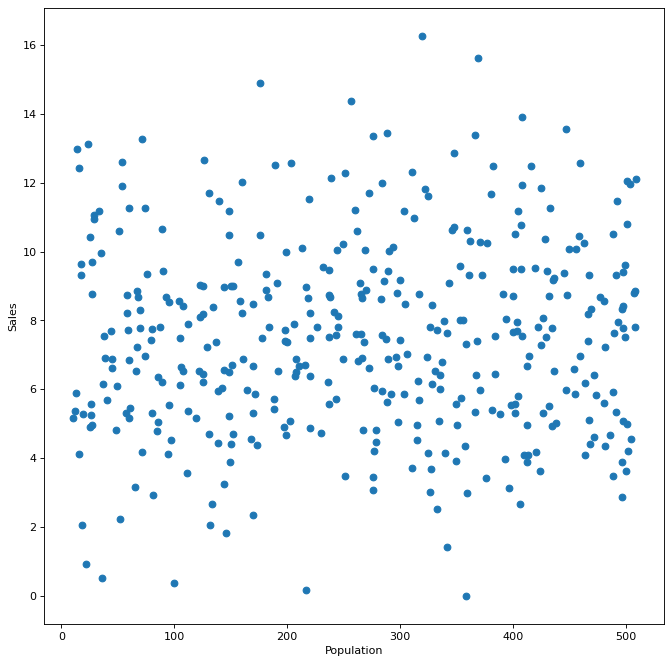

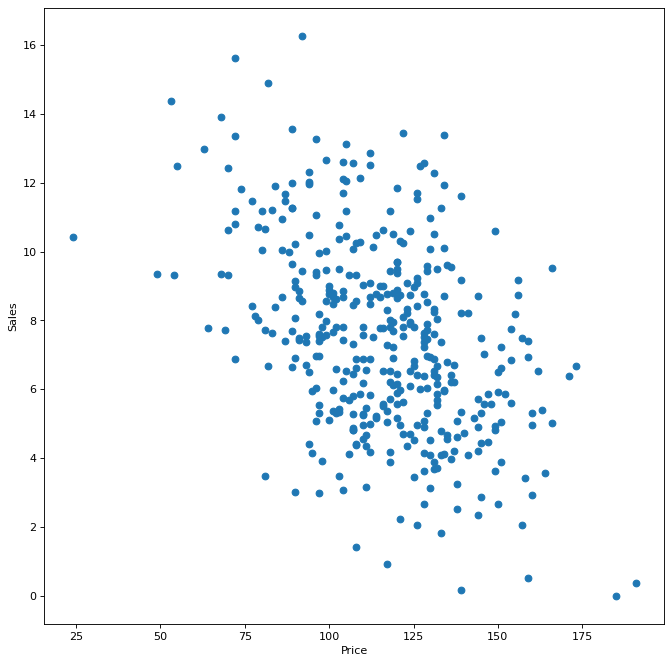

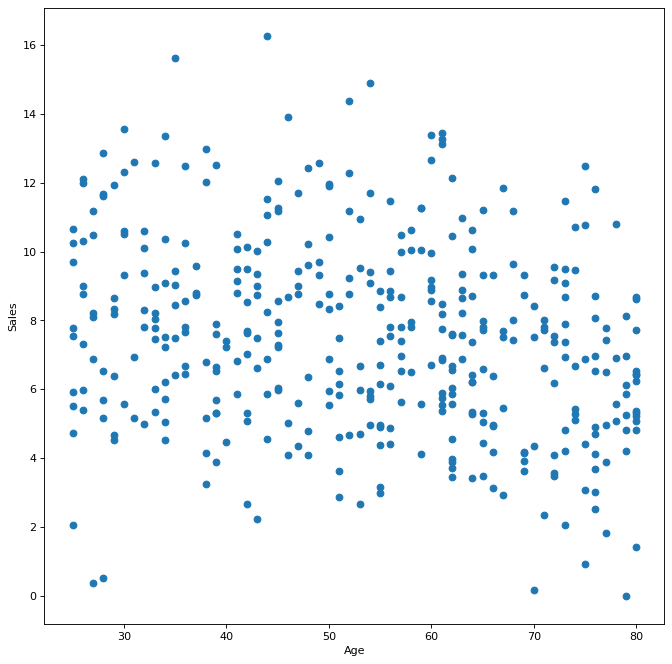

In [24]:
#distribution of numerical features with sales relationships
count_cols = ['CompPrice', 'Income','Advertising','Population','Price','Age']
for col in count_cols:
    plt.figure(figsize =(10,10),dpi=80)
    plt.scatter(x=col, y='Sales',data = df)
    plt.xlabel(f"{col}")
    plt.ylabel('Sales')
    plt.show()


<AxesSubplot:>

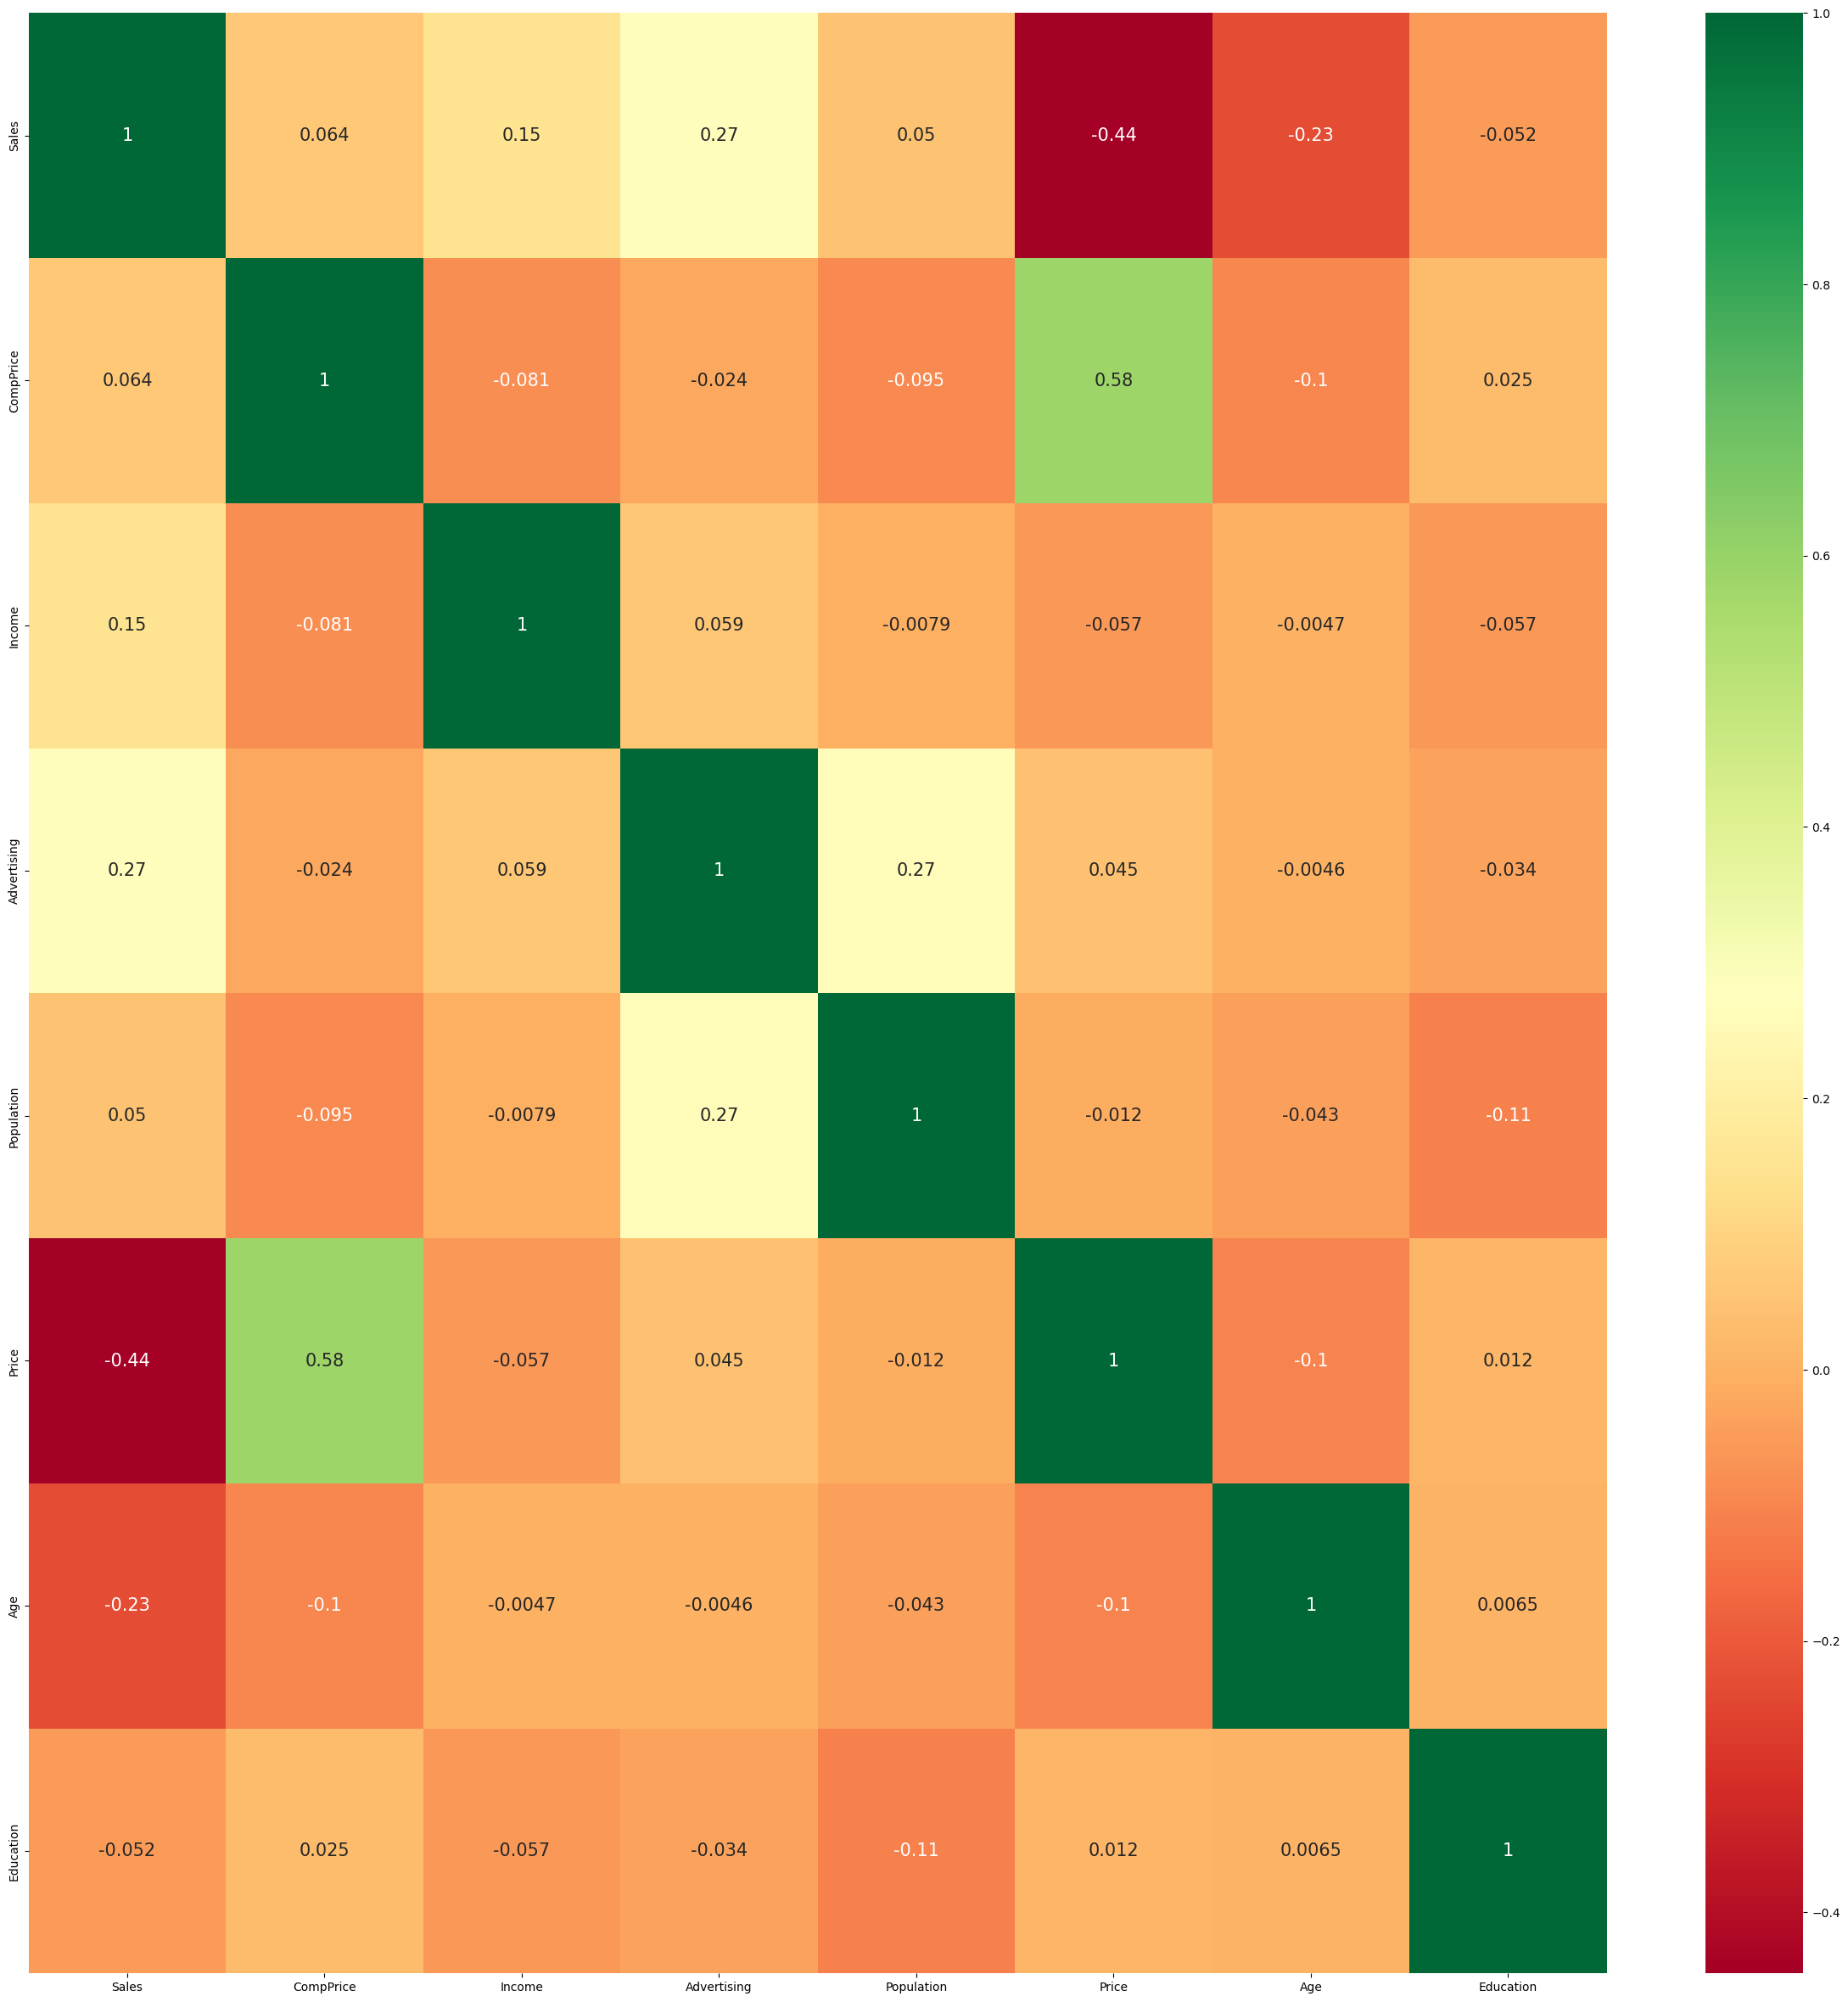

In [25]:
#what is the correlation between the continuous variables and sales
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot =True, cmap = "RdYlGn", annot_kws ={"size":15})

In [26]:
#for categorical variables
cat_cols = ['ShelveLoc','Urban','US']
for col in cat_cols:
    print(f"Feature Name {col}:\n{df[col].value_counts()}")

Feature Name ShelveLoc:
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Feature Name Urban:
Yes    282
No     118
Name: Urban, dtype: int64
Feature Name US:
Yes    258
No     142
Name: US, dtype: int64


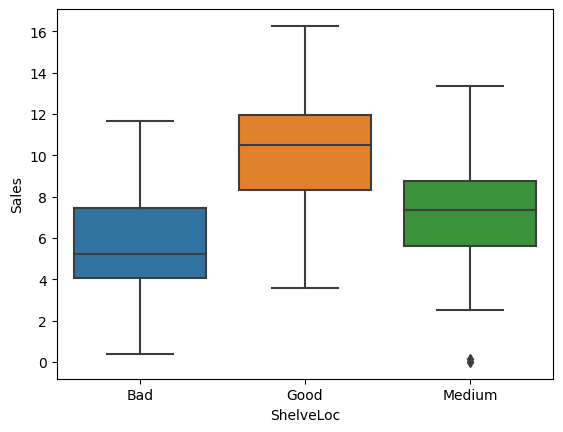

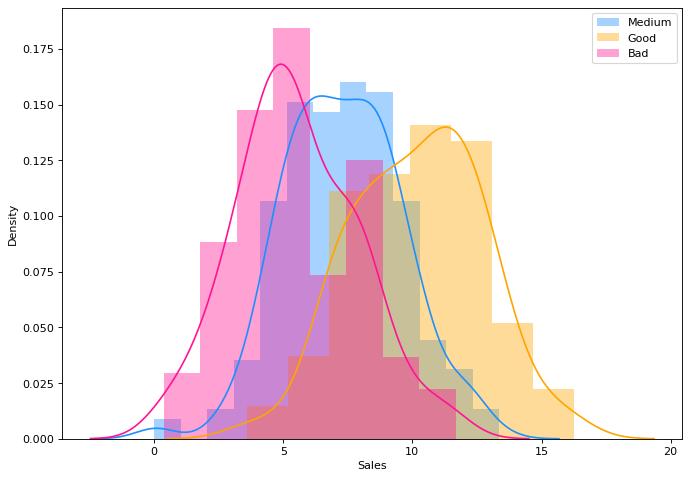

In [28]:
#boxplot for Shelveloc and sales
sns.boxplot(x="ShelveLoc", y="Sales", data=df)
plt.figure(figsize =(10,7), dpi =80)
sns.distplot(df['Sales'].loc[df['ShelveLoc']=='Medium'], color ="dodgerblue",label = "Medium")
sns.distplot(df['Sales'].loc[df['ShelveLoc']=='Good'], color ="orange",label = "Good")
sns.distplot(df['Sales'].loc[df['ShelveLoc']=='Bad'], color ="deeppink",label = "Bad")
plt.legend()


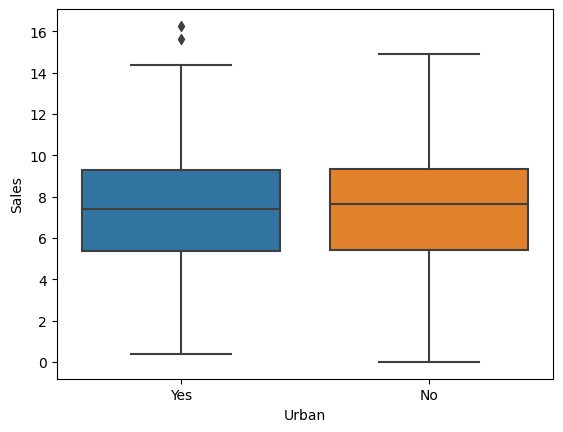

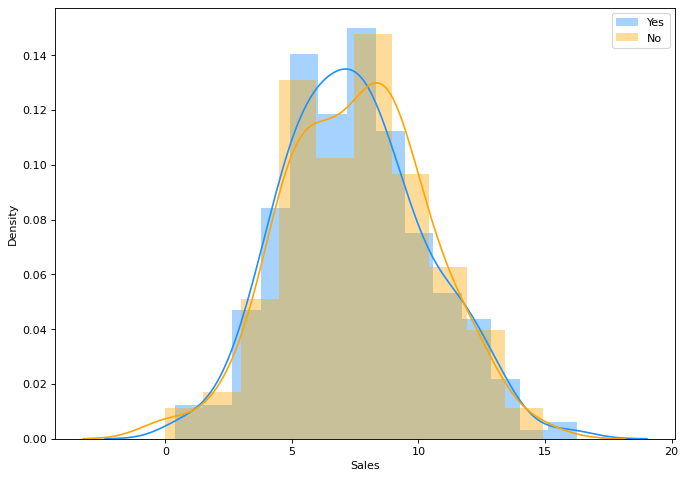

In [29]:
sns.boxplot(x="Urban", y="Sales", data=df)
plt.figure(figsize =(10,7), dpi =80)
sns.distplot(df['Sales'].loc[df['Urban']=='Yes'], color ="dodgerblue",label = "Yes")
sns.distplot(df['Sales'].loc[df['Urban']=='No'], color ="orange",label = "No")

plt.legend()

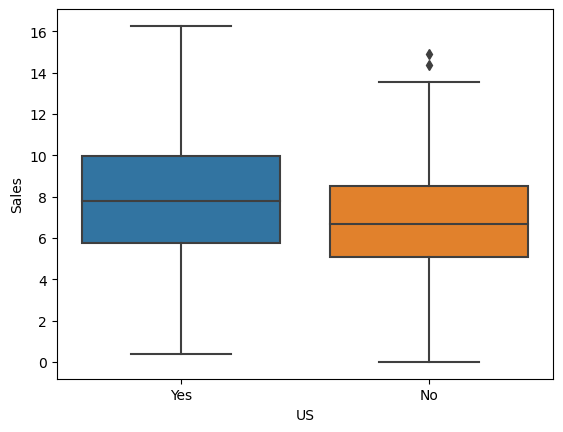

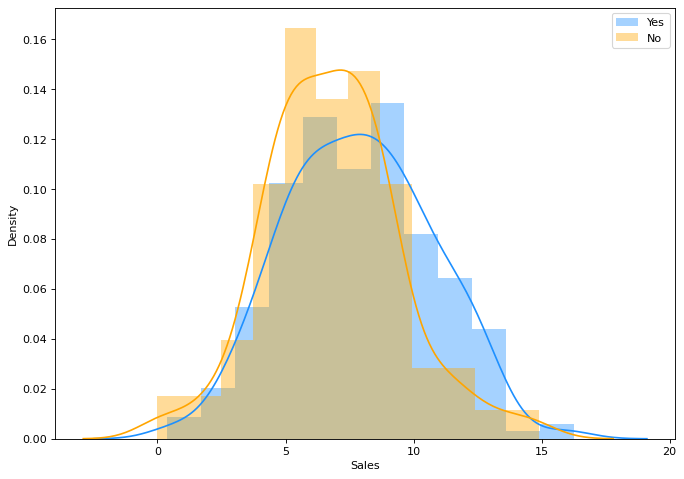

In [33]:
sns.boxplot(x="US", y="Sales", data=df)
plt.figure(figsize =(10,7), dpi =80)
sns.distplot(df['Sales'].loc[df['US']=='Yes'], color ="dodgerblue",label = "Yes")
sns.distplot(df['Sales'].loc[df['US']=='No'], color ="orange",label = "No")

plt.legend()